# ETL (EXTRACTION) PROCESS
The first step in the ETL process is extraction, where we gather data from various sources. In this project, we will focus on extracting data from a CSV file using Python's Pandas library.

**Loading raw_data from CSV file**




In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# loading the dataset
raw_data = pd.read_csv(r'C:\Users\admin\Downloads\raw_data.csv')

# Check the structure of the dataset
raw_data.info()

# Display the first few rows of the dataset
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       100 non-null    int64  
 1   customer_name  99 non-null     object 
 2   product        100 non-null    object 
 3   quantity       74 non-null     float64
 4   unit_price     65 non-null     float64
 5   order_date     99 non-null     object 
 6   region         75 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


,order_id,customer_name,product,quantity,unit_price,order_date,region
0,1,Diana,Tablet,NaN,500.0,2024-01-20,South
1,2,Eve,Laptop,NaN,NaN,2024-04-29,North
2,3,Charlie,Laptop,2.0,250.0,2024-01-08,NaN
3,4,Eve,Laptop,2.0,750.0,2024-01-07,West
4,5,Eve,Tablet,3.0,NaN,2024-03-07,South


The `row_data` dataset has the following structure:
1) Seven columns representing different attributes of each order. They include:
   - `order_id`: Unique identifier for each order 
   - `customer_name`: Name of the customer who placed the order
   - `product`: Name of the product ordered
   - `quantity`: Number of units ordered
   - `unit_price`: Price per unit of the product
   - `order_date`: Date when the order was placed
   - `region`: Geographic region where the order was placed

2) 100 rows representing individual orders placed by customers.

3) The `order_date` column is in the format 'YYYY-MM-DD' (it is however recorded as an object), and the `region` column contains categorical data representing different geographic areas.


In [16]:
# check for missing values
missing_values = raw_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check for duplicate rows
duplicate_rows = raw_data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Check if there are any columns with values that are '?', 'N/A', or 'None'
suspecious_columns = raw_data.columns[raw_data.isin(['?', 'N/A', 'None']).any()]
print("Suspecious columns with values '?', 'N/A', or 'None':", suspecious_columns.tolist())

# saving the cleaned dataset to raw_data new CSV file
raw_data.to_csv("Data/raw_data.csv", index=False)

Missing values in each column:
 order_id          0
customer_name     1
product           0
quantity         26
unit_price       35
order_date        1
region           25
dtype: int64
Number of duplicate rows: 1
Suspecious columns with values '?', 'N/A', or 'None': []


**Loading incremental_data from CSV file**


In [17]:
# loading the dataset
incremental_data = pd.read_csv(r'C:\Users\admin\Downloads\incremental_data.csv')

# Check the structure of the incremental dataset
incremental_data.info()

# Display the first few rows of the incremental dataset
incremental_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       10 non-null     int64  
 1   customer_name  4 non-null      object 
 2   product        10 non-null     object 
 3   quantity       6 non-null      float64
 4   unit_price     10 non-null     float64
 5   order_date     10 non-null     object 
 6   region         8 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 692.0+ bytes


,order_id,customer_name,product,quantity,unit_price,order_date,region
0,101,Alice,Laptop,NaN,900.0,2024-05-09,Central
1,102,NaN,Laptop,1.0,300.0,2024-05-07,Central
2,103,NaN,Laptop,1.0,600.0,2024-05-04,Central
3,104,NaN,Tablet,NaN,300.0,2024-05-26,Central
4,105,Heidi,Tablet,2.0,600.0,2024-05-21,North


In [18]:
# Check for missing values in the incremental dataset
missing_values_incremental = incremental_data.isnull().sum()
print("Missing values in each column of incremental data:\n", missing_values_incremental)

# Check for duplicate rows in the incremental dataset
duplicate_rows_incremental = incremental_data.duplicated().sum()
print("Number of duplicate rows in incremental data:", duplicate_rows_incremental)

# Check if there are any columns with values that are '?', 'N/A', or 'None' in the incremental dataset
suspecious_columns_incremental = incremental_data.columns[incremental_data.isin(['?', 'N/A', 'None']).any()]
print("Suspecious columns in incremental data with values '?', 'N/A', or 'None':", suspecious_columns_incremental.tolist())

# saving the cleaned incremental dataset to incremental_data new CSV file
incremental_data.to_csv("Data/incremental_data.csv", index=False)

Missing values in each column of incremental data:
 order_id         0
customer_name    6
product          0
quantity         4
unit_price       0
order_date       0
region           2
dtype: int64
Number of duplicate rows in incremental data: 0
Suspecious columns in incremental data with values '?', 'N/A', or 'None': []


**Visualization**
Visualizing the difference between the number of records in the `raw_data` and `incremental_data` datasets can help us understand the volume of new data being added. This can be done using a simple bar chart.

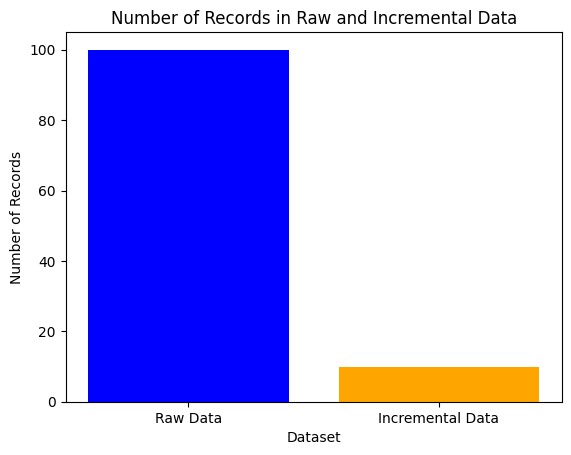

In [19]:
# Count the number of records in each dataset
raw_count = len(raw_data)
incremental_count = len(incremental_data)
# Create a bar chart to visualize the number of records
plt.bar(['Raw Data', 'Incremental Data'], [raw_count, incremental_count], color=['blue', 'orange'])
plt.title('Number of Records in Raw and Incremental Data')
plt.xlabel('Dataset')
plt.ylabel('Number of Records')
plt.show()